In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

## Read Data and EDA

In [5]:
dt = loadmat("Data/ex8data1.mat")
X = dt["X"]
Xval = dt["Xval"]
yval = dt["yval"]

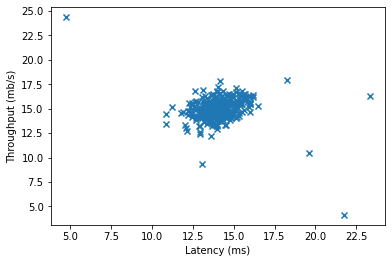

In [17]:
plt.scatter(X[:, 0], X[:, 1], marker = 'x')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

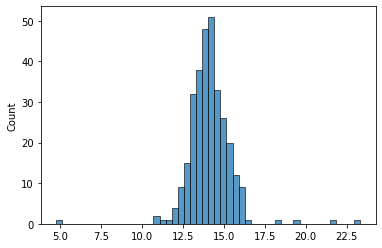

In [18]:
sns.histplot(X[:,0])
plt.show()

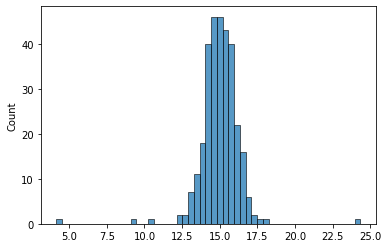

In [19]:
sns.histplot(X[:,1])
plt.show()

## Mean and Std

In [43]:
def estimate_normal_distribution(X):
    mu = np.mean(X, axis = 0)
    sigma = np.var(X, axis = 0)
    
    return mu, sigma

def estimate_multivar_normal_distribution(X,mu,sigma):
    k =len(mu)
    sigma = np.diag(sigma)
    X = X-mu.T
    p = 1/((2*np.pi)**k/2)*(np.linalg.det(sigma)**0.5)*np.exp(-0.5* np.sum(X@np.linalg.pinv(sigma)*X,axis = 1))
    return p

In [44]:
mu, sigma = estimate_normal_distribution(X)
p = estimate_multivar_normal_distribution(X, mu, sigma)

In [47]:
def GaussianVisualize():
    plt.figure(figsize = (8,6))
    X1,X2 = np.meshgrid(np.arange(0,35.5,0.5),np.arange(0,35.5,0.5))
    p2 =\
        estimate_multivar_normal_distribution(np.stack([X1.ravel(),X2.ravel()],axis = 1), mu, sigma)
    p2 =p2.reshape(X1.shape)
    plt.plot(X[:,0],X[:,1],'bx',mec ='b')
    plt.contour(X1,X2,p2,levels = 10**(np.arange(-20.,1,3)),zorder = 100 )

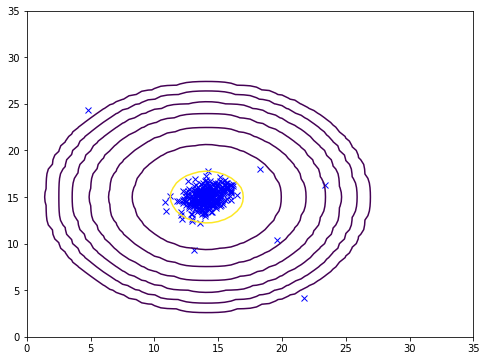

In [48]:
GaussianVisualize()

## Selecting Threshold

In [69]:
def select_threshold(pval,yval):
    best_epi = 0
    best_f1 = 0
    step_size = (max(pval)-min(pval))/1000
    epi_range =  np.arange(pval.min(),pval.max(),step_size)
    for epi in epi_range:
        prediction = (pval<epi)[:,np.newaxis]
        true_positive = np.sum(prediction[yval==1]==1)
        false_positive = np.sum(prediction[yval==0]==1)
        false_negative = np.sum(prediction[yval==1]==0)
        
        precision = true_positive/(true_positive+false_positive)
        recall = true_positive/(true_positive+false_negative)
        
        fscore = (2*precision*recall)/(precision+recall)
        
        if fscore>best_f1:
            best_f1=fscore
            best_epi = epi
            
    return best_f1,best_epi

In [70]:
mu,sigma = estimate_normal_distribution(X)
pval = estimate_multivar_normal_distribution(Xval,mu,sigma)
f1,epsilon = select_threshold(pval,yval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",f1)

Best epsilon found using cross-validation: 8.967214670681894e-05
Best F1 on Cross Validation Set: 0.8750000000000001


C:\Users\ANEDYA~1\AppData\Local\Temp/ipykernel_5404/827763240.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive/(true_positive+false_positive)


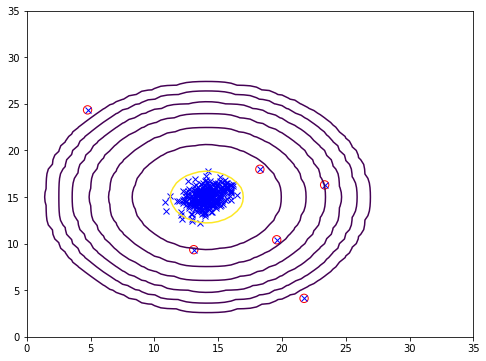

In [71]:
GaussianVisualize()
outliers = np.nonzero(p<epsilon)
plt.scatter(X[outliers,0],X[outliers,1],marker = 'o',facecolor = 'none',edgecolor ="r",s=70)
plt.show()